In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Removing duplicates

In [2]:
df1 = pd.DataFrame({"col1":[1,1,2,3],"col2":[2,2,4,6]})
df1

,col1,col2
0,1,2
1,1,2
2,2,4
3,3,6


In [3]:
# duplicates are dropped
df1 = df1.drop_duplicates()
df1

,col1,col2
0,1,2
2,2,4
3,3,6


### Joining data

In [16]:
df2 = pd.DataFrame({"Country":["US","UK","AUS"],"State/Province":["New York","Wiltshire","Queensland"]})
df3 = pd.DataFrame({"State/Province":["New York","Wiltshire","Queensland"],"City":["Sleepy Hollow","Salisbury","Brisbane"]})
df3

,State/Province,City
0,New York,Sleepy Hollow
1,Wiltshire,Salisbury
2,Queensland,Brisbane


In [17]:
df4 = pd.merge(df2,df3,on="State/Province",how='inner')
df4

,Country,State/Province,City
0,US,New York,Sleepy Hollow
1,UK,Wiltshire,Salisbury
2,AUS,Queensland,Brisbane


In [18]:
#What if two keys (column on left and column on right) have different names

help(pd.merge)

# see left_on and right_on keyword arguments

Help on function merge in module pandas.core.reshape.merge:

merge(left, right, how: str = 'inner', on=None, left_on=None, right_on=None, left_index: bool = False, right_index: bool = False, sort: bool = False, suffixes=('_x', '_y'), copy: bool = True, indicator: bool = False, validate=None) -> 'DataFrame'
    Merge DataFrame or named Series objects with a database-style join.
    
    The join is done on columns or indexes. If joining columns on
    columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
    on indexes or indexes on a column or columns, the index will be passed on.
    
    Parameters
    ----------
    left : DataFrame
    right : DataFrame or named Series
        Object to merge with.
    how : {'left', 'right', 'outer', 'inner'}, default 'inner'
        Type of merge to be performed.
    
        * left: use only keys from left frame, similar to a SQL left outer join;
          preserve key order.
        * right: use only keys from right fra

In [19]:
df2 = pd.DataFrame({"Country":["US","UK","AUS"],"State/Province":["New York","Wiltshire","Queensland"]})
df3 = pd.DataFrame({"State or Province":["New York","Wiltshire","Queensland"],"City":["Sleepy Hollow","Salisbury","Brisbane"]})
df4 = pd.merge(df2,df3,left_on="State/Province",right_on="State or Province",how='inner')
df4

,Country,State/Province,State or Province,City
0,US,New York,New York,Sleepy Hollow
1,UK,Wiltshire,Wiltshire,Salisbury
2,AUS,Queensland,Queensland,Brisbane


In [20]:
del df4['State or Province']
df4

,Country,State/Province,City
0,US,New York,Sleepy Hollow
1,UK,Wiltshire,Salisbury
2,AUS,Queensland,Brisbane


### Statistics with groupby

In [21]:
cheeses = [np.random.choice(["American","Swiss","Colbe Jack"]) for i in range(100)]
reviews = [np.random.randint(4,9) for i in range(100)]

In [22]:
df6 = pd.DataFrame({"Cheese":cheeses,"Reviews (1-10)":reviews})
df6

,Cheese,Reviews (1-10)
0,Colbe Jack,8
1,American,5
2,American,5
3,Swiss,8
4,Colbe Jack,5
...,...,...
95,Swiss,6
96,American,4
97,American,6
98,American,7


In [23]:
df6.groupby("Cheese")['Reviews (1-10)'].mean()

Cheese
American      6.206897
Colbe Jack    5.920000
Swiss         5.608696
Name: Reviews (1-10), dtype: float64

In [24]:
df6.groupby("Cheese").mean()['Reviews (1-10)']

Cheese
American      6.206897
Colbe Jack    5.920000
Swiss         5.608696
Name: Reviews (1-10), dtype: float64

In [25]:
help(df6.groupby)


Help on method groupby in module pandas.core.frame:

groupby(by=None, axis=0, level=None, as_index: bool = True, sort: bool = True, group_keys: bool = True, squeeze: bool = False, observed: bool = False) -> 'groupby_generic.DataFrameGroupBy' method of pandas.core.frame.DataFrame instance
    Group DataFrame using a mapper or by a Series of columns.
    
    A groupby operation involves some combination of splitting the
    object, applying a function, and combining the results. This can be
    used to group large amounts of data and compute operations on these
    groups.
    
    Parameters
    ----------
    by : mapping, function, label, or list of labels
        Used to determine the groups for the groupby.
        If ``by`` is a function, it's called on each value of the object's
        index. If a dict or Series is passed, the Series or dict VALUES
        will be used to determine the groups (the Series' values are first
        aligned; see ``.align()`` method). If an ndarray 

#### See also this link https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

### Plotting 

In [26]:
help(df6.plot)

Help on PlotAccessor in module pandas.plotting._core object:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data)
 |  
 |  Make plots of Series or DataFrame.
 |  
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |  
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 |      - 'p

#### Take a look at 'kind'

- Will need different keywords for different plots on occassion 
- Some examples: figsize, autopct (pie charts), xticks

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002AFB3B7DAC8>],
      dtype=object)

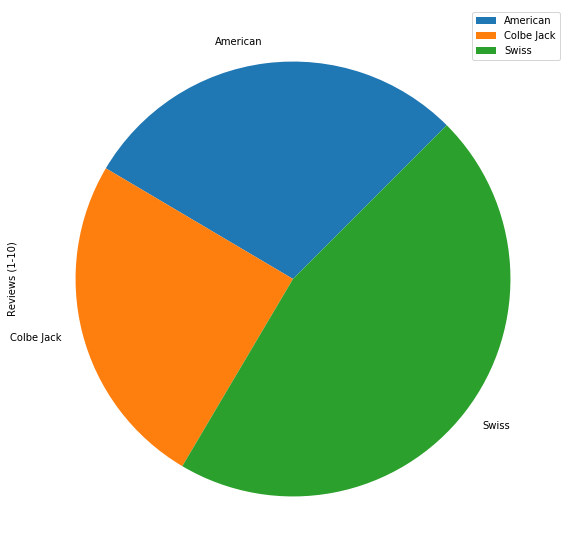

In [27]:
# using pandas
df6.groupby("Cheese").count().plot(kind='pie',subplots=True,figsize=(10,10),startangle=45)

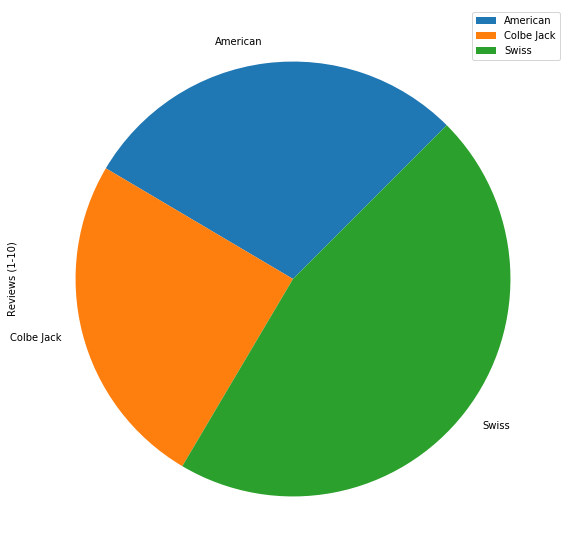

In [28]:
# using pandas
df6.groupby("Cheese").count().plot(kind='pie',y='Reviews (1-10)',figsize=(10,10),startangle=45)

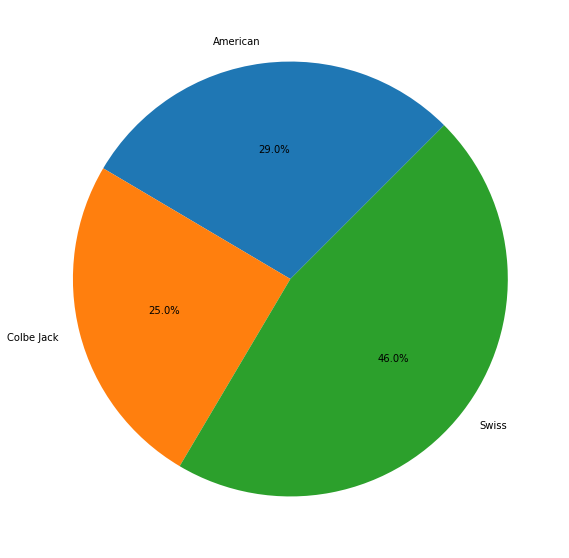

In [29]:
#using plt
values = df6.groupby("Cheese").count()['Reviews (1-10)'].values
labels = df6.groupby("Cheese").count()['Reviews (1-10)'].index
plt.figure(figsize=(10,10))
plt.pie(values,labels=labels,autopct="%1.1f%%",startangle=45)
plt.show()

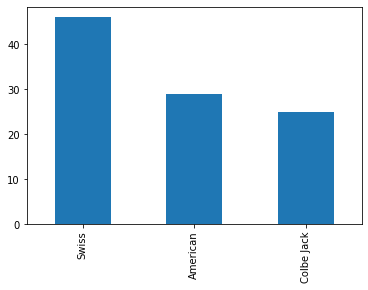

In [30]:
#total number of reviews for each cheese
df6['Cheese'].value_counts().plot(kind='bar')
plt.show()

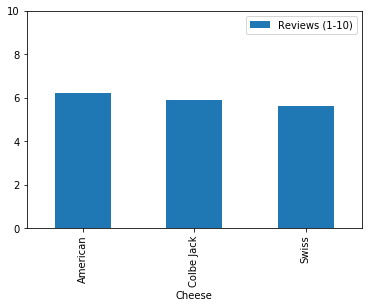

In [31]:
df6.groupby("Cheese").mean().plot(kind='bar')
plt.ylim(0,10)
plt.show()

<BarContainer object of 3 artists>

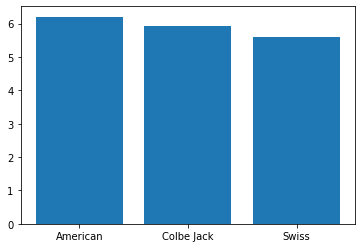

In [32]:
# plotting with PLT
vals = df6.groupby("Cheese").mean()['Reviews (1-10)'].values
plt.bar(df6.groupby("Cheese").mean().index, vals)
